<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>1. Import required libraries and read the data</span></b> 

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
# evaluation metrics
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [121]:
df = pd.read_csv(r"D:\PROJECTS_IIITD\Module-6-Advanced_Machine_Learning\project_1\Apps_data.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [122]:
df.shape

(10841, 13)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>2. Data cleansing and Exploratory data analysis</span></b> 

#### 2.1 Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [124]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


- The minimum rating for app is 1 and maximum rating is 19 which is unusual because normally the ratings for app are out of 5.

In [125]:
df.describe(include ='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


- There are 9660 unique apps but app count is 10841 which indicates presence of duplicates because normally an app's name and its respective information should exist only once.
- Most apps are of category 'Family'.
- Most apps donot have any registered reviews.
- Most apps are free of cost and have price 0.


*Columns that need to be worked upon for model building:-*
- The 'App' column has duplicate values  that have to be treated.
- Most columns are of object type and need to be converted to numeric data type.
- 'Category', 'Type', 'Content Rating' columns require label encoding.
- We can drop columns like 'Last updated', 'Current Ver', 'Android Ver' as they seem to contribute very less to rating prediction.

#### 2.2 Check if there are any duplicate records in the dataset? if any drop them.

In [126]:
df.duplicated().any()

True

In [127]:
df.shape

(10841, 13)

In [128]:
df['App'].value_counts().head(10)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

- Normally, there should exist a single value count for every app but there are several occurences for many apps so we need to drop the extras.

In [129]:
df1 = df.copy()
df1.drop_duplicates(inplace=True)

In [130]:
df1['App'].value_counts().head(10)

ROBLOX                 9
8 Ball Pool            7
Bubble Shooter         6
Helix Jump             6
Zombie Catchers        6
slither.io             5
Angry Birds Classic    5
Farm Heroes Saga       5
Candy Crush Saga       5
Subway Surfers         5
Name: App, dtype: int64

In [131]:
df1.shape

(10358, 13)

- The number of rows have been reduced from 10841 to 10358, after removing duplicates but the value counts are still not 1.
- We need to treat the 'App' column separately for duplicates. 

In [132]:
df1.drop_duplicates('App',inplace=True)

In [133]:
df1.duplicated().any()

False

In [134]:
df1.shape

(9660, 13)

In [135]:
df1['App'].value_counts().head(10)

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
FlexBook                                          1
Can Knockdown 3                                   1
Fu*** Weather (Funny Weather)                     1
OB-GYN USMLE Stp2 CK 300 Q & A                    1
Name: App, dtype: int64

#### 2.3 Check the unique categories of the column 'Category', Is there are any invalid category? If yes drop them.

In [136]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [137]:
df1['Category'].nunique()

34

In [138]:
df2 = df1.copy()

In [139]:
# dropping the invalid entry '1.9'

df2 = df2.drop(df2[df2['Category'] == '1.9'].index)

In [140]:
df2['Category'].nunique()

33

In [141]:
df2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#### 2.4 Check if there are missing values present in the column Rating, If any? drop them and Convert ratings to high and low categories(>3.5 is high rest low) and store it in a new column ‘Rating_category’.

In [142]:
missing_values = df2.isna().sum()
percent = (df2.isna().sum()/len(df2))*100
df_ = pd.DataFrame({'missing_values': missing_values, 'percent_missing':percent})
df_

,missing_values,percent_missing
App,0,0.000000
Category,0,0.000000
Rating,1463,15.146495
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.010353
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000


In [143]:
df3 = df2.copy()
df3.dropna(inplace=True)

In [144]:
df3.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [145]:
df3.shape

(8190, 13)

In [146]:
# Define the threshold value
threshold = 3.5

# Define a function to convert ratings
def convert_rating(rating):
    if rating >= threshold:
        return 'High'
    else:
        return 'Low'

# create the 'Rating_category' column
df3['Rating_category'] = df3['Rating'].apply(convert_rating)

# Display the updated DataFrame
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


#### 2.5 Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

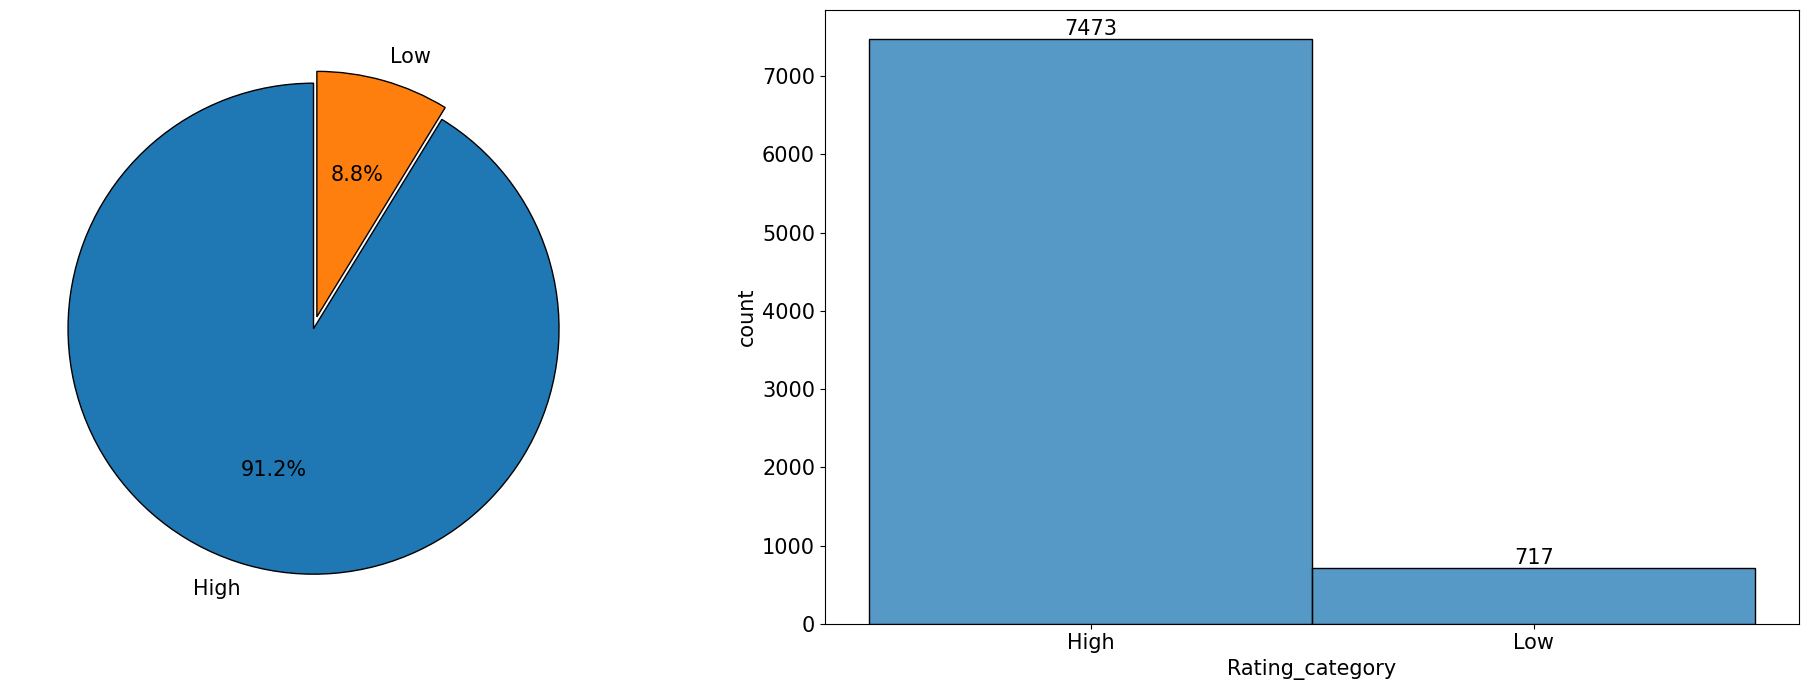

In [147]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
ax1.pie(df3['Rating_category'].value_counts().values, labels = df3['Rating_category'].value_counts().index, startangle= 90, explode = [0.05,0] , autopct='%1.1f%%', textprops ={'fontsize': 15}, wedgeprops={'edgecolor':'black'})

ax =sns.histplot(ax=ax2, data = df3['Rating_category'])
ax.set_xlabel('Rating_category', fontsize=15)
ax.set_ylabel('count', fontsize=15)
for label in ax.containers:
    ax.bar_label(label, fontsize = 15, color = 'black')
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)    
plt.tight_layout()

The target column 'Rating_category' is highly imbalanced.

#### 2.6 Convert the column "Reviews" to numeric datatype and check the presence of outliers in the column and handle the outliers using transformation approach.

In [148]:
df3['Reviews'].dtype

dtype('O')

In [149]:
# converting datatype of Reviews from Object to Numeric
df3['Reviews'] = pd.to_numeric(df3['Reviews'], errors='coerce')

In [150]:
df3['Reviews'].dtype

dtype('int64')

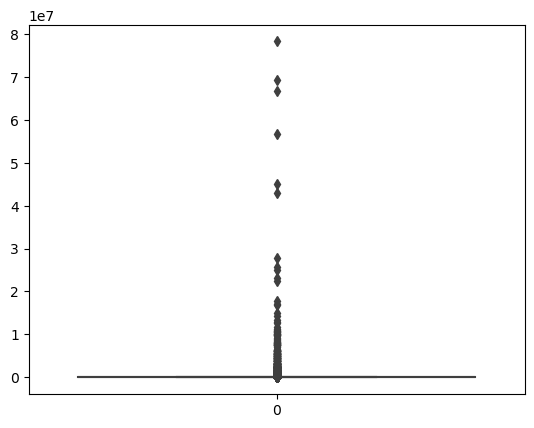

In [151]:
sns.boxplot(df3['Reviews'])
plt.show()

In [152]:
df3['Reviews'].skew()

24.50402456787053

In [153]:
# making two copies of df3 to check the performance of square-root and log transformation on 'Reviews' column

df_l = df3.copy()
df_s = df3.copy()

In [154]:
df_sqrt = pd.DataFrame({'Reviews':np.sqrt(df_s['Reviews'])})

In [155]:
df_sqrt.head()

,Reviews
0,12.609520
1,31.096624
2,295.820892
3,464.374849
4,31.096624


In [156]:
df_log = pd.DataFrame({'Reviews':np.log(df_l['Reviews'])})

In [157]:
df_log.head()

,Reviews
0,5.068904
1,6.874198
2,11.379508
3,12.281384
4,6.874198


In [158]:
df_sqrt['Reviews'].skew()

6.604030741994298

In [159]:
df_log['Reviews'].skew()

-0.04029708512229868

- The log transformation has reduced the skewness better than square-root transformation (closer to zero) so we will use log transformation on Reviews column.

In [160]:
df3['Reviews'] = np.log(df3['Reviews'])

In [161]:
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


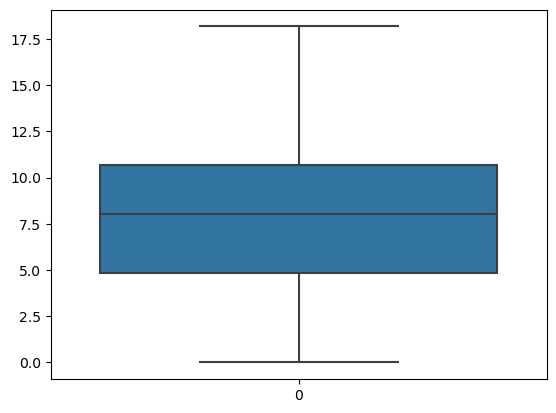

In [162]:
sns.boxplot(df3['Reviews'])
plt.show()

#### 2.7. The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into suitable datatype.

In [163]:
# number of rows with entry as 'Varies with device'
df3['Size'].value_counts()['Varies with device']

1169

In [164]:
df3['Size'].value_counts()['Varies with device']/len(df3)*100

14.273504273504273

In [165]:
# datatype of feature 'Size' before type conversion
df3['Size'].dtype

dtype('O')

In [166]:
df4 = df3.copy()

In [167]:
# de-selecting entries with 'Varies with device' in the Size column in dataframe df4

df4 = df4[df4['Size'] != 'Varies with device']

In [168]:
df4.shape

(7021, 14)

In [169]:
df4['Size'] = df4['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [170]:
df4['Size'] = pd.to_numeric(df4['Size'], errors='coerce')

In [171]:
df4['Size'].dtype

dtype('float64')

In [172]:
df4.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High


#### 2.8. Check the column 'Installs', handle the unwanted characters and convert the column into suitable dataype.

In [173]:
#Cleaning the column 'Installs' from characters like ',' and '+' 

df4['Installs'] = [int(i[:-1].replace(',','')) for i in df4['Installs']]

In [174]:
df4['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [175]:
# Converting to numeric type
df4['Installs'] = pd.to_numeric(df4['Installs'], errors = 'coerce')
df4['Installs'].dtype

dtype('int64')

#### 2.9. Check the column 'Price', remove the unwanted characters and convert the column into suitable datatype.

In [176]:
df4['Price'].dtype

dtype('O')

In [177]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = pd.to_numeric(price)
        return price

df4['Price'] = df4['Price'].map(price_clean)

In [178]:
df4['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [179]:
df4['Price'].dtype

dtype('float64')

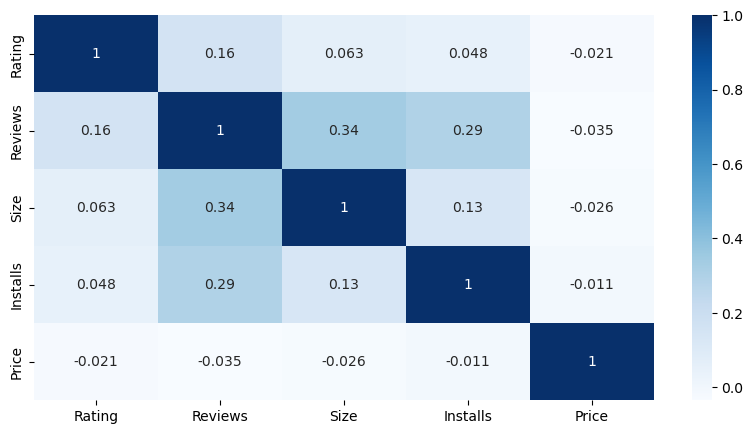

In [180]:
plt.figure(figsize=(10,5))
sns.heatmap(df4.corr(), annot = True, cmap='Blues')
plt.show()

<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>3. Data Preparation for model building </span></b> 

#### 3.1. Drop the columns which you think redundant for the analysis.

- The 'App' column is not needed beacuse app name might not affect the rating much.
- Similarly, Last Updated, Current Ver and Android Ver are features that have very less to do with the rating of an app.
- We will also drop the 'Rating' column as we have created a separate column Rating_category from it.

In [181]:
df5 = df4.copy()

In [182]:
df5 = df5.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)

In [183]:
df5.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,High


In [184]:
df5.shape

(7021, 8)

#### 3.2. For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0.

In [185]:
df5['Rating_category'] = df5['Rating_category'].replace({'High':1,'Low':0})

In [186]:
df5.sample(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
10231,SOCIAL,5.560682,1300000.0,10000,Free,0.0,Teen,1
6166,PHOTOGRAPHY,10.468460,6200000.0,1000000,Free,0.0,Everyone,1
2882,PHOTOGRAPHY,11.617880,74000000.0,5000000,Free,0.0,Everyone,1


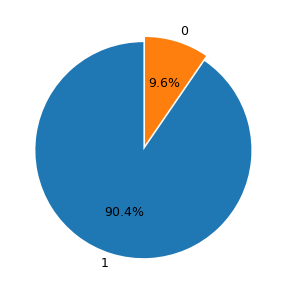

In [187]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.pie(df5['Rating_category'].value_counts().values, labels = df5['Rating_category'].value_counts().index, startangle= 90, explode = [0.05,0] , autopct='%0.1f%%', textprops ={'fontsize': 9})
plt.tight_layout()

#### 3.3. Encode the categorical columns.

In [188]:
df5.select_dtypes(include=['object']).columns

Index(['Category', 'Type', 'Content Rating'], dtype='object')

In [189]:
le = LabelEncoder()
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        df[col] = le.fit_transform(list(df[col]))

In [190]:
categorical_to_numeric(df5)

In [191]:
df5.sample(5) 

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
10620,21,4.890349,14000000.0,10000,0,0.0,1,1
502,7,12.267290,11000000.0,10000000,0,0.0,3,1
4363,14,6.803505,63000000.0,50000,0,0.0,1,1
7853,11,6.098074,29000000.0,50000,0,0.0,1,1
2042,11,9.831777,10000000.0,1000000,0,0.0,1,1


#### 3.4. Segregate the target and independent features.

In [192]:
X = df5.drop('Rating_category',axis=1)
y = df5['Rating_category']

In [193]:
pd.DataFrame(y).value_counts(normalize=True)*100

Rating_category
1                  90.442957
0                   9.557043
dtype: float64

####  Handle the imbalanced data using oversampling or undersampling approach, and check the distribution of the resampled target class.

In [194]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.65)
X_res,y_res = smote.fit_resample(X,y)

In [195]:
## Checking the distribution of the resampled target class
pd.DataFrame(y_res).value_counts(normalize=True)*100

Rating_category
1                  60.608953
0                  39.391047
dtype: float64

#### 3.5. Split the dataset into train and test.

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.30, random_state = 42)

In [197]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7333, 7) (3144, 7)
(7333,) (3144,)


In [198]:
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
7964,13,3.046714,3.113465e+06,10000,0,0.0,1
6507,23,11.007054,1.300000e+07,5000000,0,0.0,1
3443,11,9.672501,4.000000e+07,1000000,0,0.0,4
6096,21,1.386294,5.300000e+06,100,0,0.0,1
6369,21,3.663562,4.200000e+06,5000,0,0.0,1


In [199]:
X_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
1496,27,9.705280,2.300000e+06,1000000,0,0.00000,1
8943,8,2.054585,4.957705e+06,1000,0,0.84168,1
8970,14,2.384085,5.256049e+06,275,0,0.00000,1
6109,14,6.318968,4.400000e+07,100000,0,0.00000,4
8180,9,4.454751,5.500000e+06,31388,0,0.00000,1


<a id="1.1"></a>
## <b> <span style='color:#F1B12D'>4. Model training and testing </span></b> 

### Build a base model using the Original Imbalanced data.

#### Split the dataset into train and test.

In [200]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [201]:
print(X_train_base.shape,X_test_base.shape)
print(y_train_base.shape,y_test_base.shape)

(4914, 7) (2107, 7)
(4914,) (2107,)


#### 4.1. Write a function to fit and print the model predictions, input parameters would be model, train, and test data

In [202]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  
    
    model.fit(X_train, y_train)  

    pred = model.predict(X_test)  
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('\033[1;46;13m Train accuracy: \033[0;0m',train_score)
    print('\033[1;46;13m Test accuracy: \033[0;0m',test_score)
    print('\n')
    print('\033[1;46;13m Confusion matrix: \033[0;0m','\n',confusion_matrix(y_test, pred))
    print('\n')
    print('\033[1;46;13m Classification report: \033[0;0m','\n',classification_report(y_test, pred))

#### 4.2. Use the above function and train a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models and make predictions on test data and evaluate the models. 

#### DECISION TREES

In [203]:
## instantiate 
dt = DecisionTreeClassifier()

## call the function
fit_n_print(dt, X_train_base, X_test_base, y_train_base, y_test_base)

 Train accuracy:  0.9997964997964998
 Test accuracy:  0.8500237304224015


 Confusion matrix:  
 [[  43  153]
 [ 163 1748]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.21      0.22      0.21       196
           1       0.92      0.91      0.92      1911

    accuracy                           0.85      2107
   macro avg       0.56      0.57      0.57      2107
weighted avg       0.85      0.85      0.85      2107



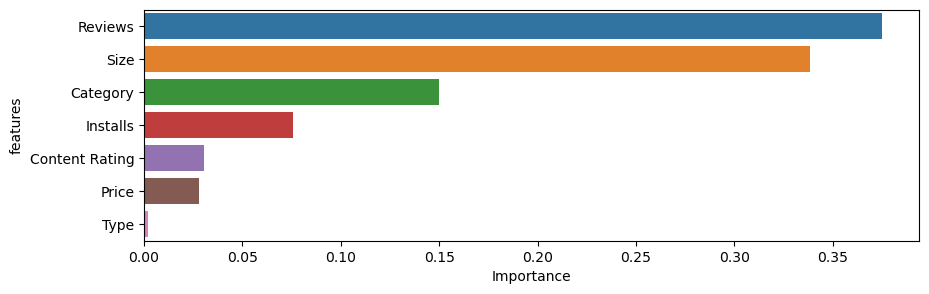

In [204]:
# Checking feature importance

feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,3))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

#### RANDOM FOREST

In [205]:
## instanstiate
rf = RandomForestClassifier()

## call the function
fit_n_print(rf, X_train_base, X_test_base, y_train_base, y_test_base)

 Train accuracy:  0.9995929995929996
 Test accuracy:  0.8984337921214998


 Confusion matrix:  
 [[  11  185]
 [  29 1882]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.28      0.06      0.09       196
           1       0.91      0.98      0.95      1911

    accuracy                           0.90      2107
   macro avg       0.59      0.52      0.52      2107
weighted avg       0.85      0.90      0.87      2107



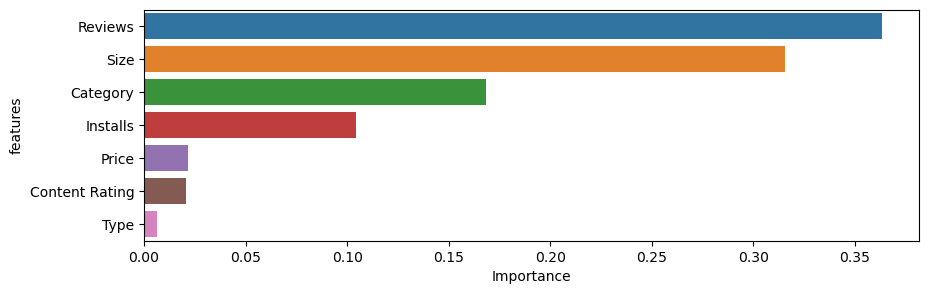

In [206]:
# Checking feature importance

feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,3))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

#### BAGGING CLASSIFIER

In [207]:
## instanstiate
bg = BaggingClassifier()

## call the function
fit_n_print(bg, X_train_base, X_test_base, y_train_base, y_test_base)

 Train accuracy:  0.9934879934879934
 Test accuracy:  0.8780256288561936


 Confusion matrix:  
 [[  22  174]
 [  83 1828]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.21      0.11      0.15       196
           1       0.91      0.96      0.93      1911

    accuracy                           0.88      2107
   macro avg       0.56      0.53      0.54      2107
weighted avg       0.85      0.88      0.86      2107



#### GRADIENT BOOSTING

In [208]:
## instanstiate 
gb = GradientBoostingClassifier()

## call the function
fit_n_print(gb, X_train_base, X_test_base, y_train_base, y_test_base)

 Train accuracy:  0.9065934065934066
 Test accuracy:  0.9046037019458947


 Confusion matrix:  
 [[   0  196]
 [   5 1906]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.91      1.00      0.95      1911

    accuracy                           0.90      2107
   macro avg       0.45      0.50      0.47      2107
weighted avg       0.82      0.90      0.86      2107



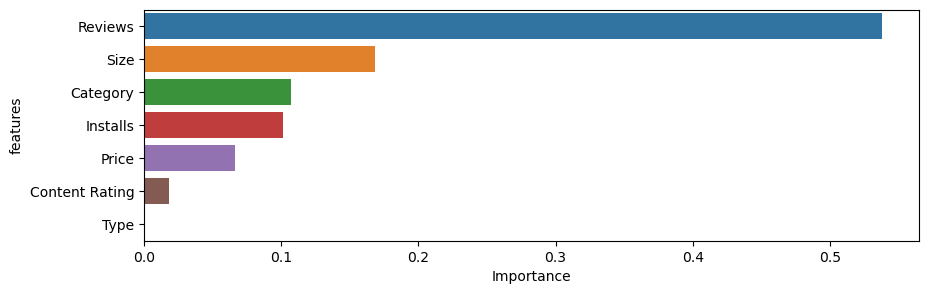

In [209]:
# Checking feature importance

feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': gb.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,3))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

#### ADA BOOSTING

In [210]:
## instanstiate
ab = AdaBoostClassifier()

## call the function
fit_n_print(ab, X_train_base, X_test_base, y_train_base, y_test_base)

 Train accuracy:  0.9039479039479039
 Test accuracy:  0.9069767441860465


 Confusion matrix:  
 [[   0  196]
 [   0 1911]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.91      1.00      0.95      1911

    accuracy                           0.91      2107
   macro avg       0.45      0.50      0.48      2107
weighted avg       0.82      0.91      0.86      2107



#### STACKING



In [211]:
## instantiate
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

## call the function
fit_n_print(clf, X_train_base, X_test_base, y_train_base, y_test_base)

 Train accuracy:  0.904965404965405
 Test accuracy:  0.9022306597057428


 Confusion matrix:  
 [[   7  189]
 [  17 1894]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.29      0.04      0.06       196
           1       0.91      0.99      0.95      1911

    accuracy                           0.90      2107
   macro avg       0.60      0.51      0.51      2107
weighted avg       0.85      0.90      0.87      2107



*Inferences:*
- We can observe that we have a very good accuracy score, BUT we have target which is highly imbalanced and accuracy will be biased and it is not a suitable metric to evaluate the model performance.
- Precision, recall score, and f1-score is good for class 1 (majority class), where as precision, recall, and f1-score is almost zero for 0(minority class), due to the imbalance dataset.
- So, need to consider Recall score to evaluate the performance of the model. Here we have recall score approximately 0 that is not acceptable.
- In order to increase our model performance, we need to use the balanced data.

### Model building using the Balanced data

#### DECISION TREES

In [212]:
## instantiate 
dt = DecisionTreeClassifier()

## call the function
fit_n_print(dt, X_train, X_test, y_train, y_test)

 Train accuracy:  0.999727260330015
 Test accuracy:  0.8489185750636132


 Confusion matrix:  
 [[1009  204]
 [ 271 1660]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1213
           1       0.89      0.86      0.87      1931

    accuracy                           0.85      3144
   macro avg       0.84      0.85      0.84      3144
weighted avg       0.85      0.85      0.85      3144



#### RANDOM FOREST

In [214]:
## instanstiate
rf = RandomForestClassifier()

## call the function
fit_n_print(rf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.999727260330015
 Test accuracy:  0.8934478371501272


 Confusion matrix:  
 [[1029  184]
 [ 151 1780]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1213
           1       0.91      0.92      0.91      1931

    accuracy                           0.89      3144
   macro avg       0.89      0.89      0.89      3144
weighted avg       0.89      0.89      0.89      3144



#### BAGGING CLASSIFIER

In [216]:
## instanstiate
bg = BaggingClassifier()

## call the function
fit_n_print(bg, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9930451384153826
 Test accuracy:  0.8762722646310432


 Confusion matrix:  
 [[1012  201]
 [ 188 1743]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1213
           1       0.90      0.90      0.90      1931

    accuracy                           0.88      3144
   macro avg       0.87      0.87      0.87      3144
weighted avg       0.88      0.88      0.88      3144



#### GRADIENT BOOSTING

In [217]:
## instanstiate 
gb = GradientBoostingClassifier()

## call the function
fit_n_print(gb, X_train, X_test, y_train, y_test)

 Train accuracy:  0.8648574935224328
 Test accuracy:  0.8584605597964376


 Confusion matrix:  
 [[ 882  331]
 [ 114 1817]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1213
           1       0.85      0.94      0.89      1931

    accuracy                           0.86      3144
   macro avg       0.87      0.83      0.84      3144
weighted avg       0.86      0.86      0.86      3144



#### ADA BOOSTING

In [219]:
## instanstiate
ab = AdaBoostClassifier()

## call the function
fit_n_print(ab, X_train, X_test, y_train, y_test)

 Train accuracy:  0.8060820946406655
 Test accuracy:  0.8027989821882952


 Confusion matrix:  
 [[ 874  339]
 [ 281 1650]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      1213
           1       0.83      0.85      0.84      1931

    accuracy                           0.80      3144
   macro avg       0.79      0.79      0.79      3144
weighted avg       0.80      0.80      0.80      3144



#### STACKING

In [220]:
## instantiate
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

## call the function
fit_n_print(clf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.99127233056048
 Test accuracy:  0.898854961832061


 Confusion matrix:  
 [[ 996  217]
 [ 101 1830]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1213
           1       0.89      0.95      0.92      1931

    accuracy                           0.90      3144
   macro avg       0.90      0.88      0.89      3144
weighted avg       0.90      0.90      0.90      3144



*Inferences:*
- By balancing the dataset we see significant improvement in the performance metrics for the minority class, however, there was a slight decrease in accuracy scores for the balanced dataset as compared to the imbalanced dataset.
- The greatest accuracy score for test set is obtained as 89% for Stacking.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**